# Modelagem e Simulação Multifísica - Aula 06

## O problema do alto-falante

## 1 - Descrição das físicas envolvidas (PDEs)

Considere o alto-falante da figura a seguir: O dispositivo é composto por imã permanente (1), uma bobina de cobre com $N$ espiras (2), um sistema elástico de fixação (3) e um cone rígido (4). Uma versão detalhada dos demais componentes é apresentada na fig. 2. 

<center>Fig. 1 Geometria de um alto-falante.</center>

<a title="Svjo, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Loudspeaker-bass.png"><img width="256" alt="Loudspeaker-bass" src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Loudspeaker-bass.png/256px-Loudspeaker-bass.png"></a>

<center>Fig. 2 Componentes de um alto-falante. <a href="http://www.novacon.com.br/audioafca.htm"> Fonte: Novacon</a>. </center>
<p>
    <img width="450" height="85" src="Figs/Aula04_alto-falante_partes.jpg">
</p>


No que se refere às físicas envolvidas, podemos destacar o circuito magnético governado pelas equações de Maxwell, o problema de tensão e deformação das partes móveis do alto-falante, regido pela mecânica dos sólidos e o problema de propagação da onda acústica gerada pelo movimento do cone (equação de onda). Alguns exemplos das físicas envolvidas são apresentadas a seguir:

### 1.1 - O problema elastodinâmico do cone

A equação da elastodinâmica combina o equilíbrio do momento linear:

\begin{equation}
\nabla\cdot\sigma + \rho f = \rho\ddot{u}
\end{equation}

onde $u$ é o campo vetorial de deslocamento, $\ddot{u}$ é a aceleração, $\rho$ é a densidade do material, $f$ é uma força de corpo aplicada, e $\sigma$ é o tensor de tensões que está relacionado ao deslocamento por meio de uma equação constitutiva. No caso da elasticidade linear isotrópica, tem-se:

\begin{equation}
\sigma = \lambda tr(\epsilon)I + 2\mu\epsilon  
\end{equation} 
onde 
\begin{equation}
\epsilon = \frac{\nabla u + (\nabla u)^T }{2}, 
\end{equation}
é o tensor de deformação linear, I é um tensor identidade de rank dois e $\lambda$, $\mu$ são os coeficientes de Lamé. 

### 1.2 - O problema eletromagnético

Já a interação entre a corrente na bobina móvel, o imã e as peças ferromagnéticas do alto-falante é governada pelas equações de Maxwell no regime quase-estático: 

\begin{eqnarray}
\nabla\times H &=& J \\
\nabla\cdot B &=& 0 \\
\nabla\times E &=& -\frac{\partial B}{\partial t} \\
\nabla\cdot E &=& 0
\end{eqnarray}
onde $H$ é o campo magnético, $B$ a densidade de fluxo magnético, $E$ é o campo elétrico e $J$ a densidade de corrente elétrica que pode ser dividida entre a parcela injetada na bobina $J_i$ (fonte externa) e as correntes induzidas nos materiais com condutividade ($J = J_i + \sigma E$), sendo que para o caso do alto-falante o segunto termpo pode ser negligenciado. 

A solução desse sistema de equações deve levar em conta ainda a não linearidade da permeabilidade magnética $\mu$ do imã e do material ferromagnético na relação constitutiva $B = \mu(H)H$. 

### 1.3 - Acoplamento entre as duas físicas:

O acoplamento entre as duas físicas se dá pela força de Laplace:
\begin{equation}
f = J\times B
\end{equation}
onde a força de corpo do primeiro problema é gerada a partir da interação entre a corrente na bobina e o campo magnético gerado pelo ímã. Assumindo que a solução do problema eletromagnético depende da posição e velocidade da bobina, um simples alto-falante pode se tornar um problema multifísico complexo que requer a solução simultânea de diversas equações diferenciais parciais. 

Felizmente, dada a geometria axissimétrica do dispositivo (e usando algumas simplificações) é possível obter um modelo concentrado que descreve o comportamento do alto-falante por meio de um conjunto de equações diferenciais ordinárias.

## 2 - Representação por elementos concentrados (ODE)



### 2.1 - O modelo circuital equivalente.

Do ponto de vista dos terminais de uma fonte conectada ao alto-falante, o dispositivo pode ser substituído por um modelo de circuito equivalente igual ao utilizado no problema do levitador magnético.

<p>
    <img width="350" height="100" src="Figs/LevitadorCirc.png">
</p>

No circuito, $R$ representa a resistência do fio da bobina, e pode ser estimado pela seção transversal do fio, seu comprimento total e sua condutividade $\sigma$. Em princípio, a condutividade de um condutor é função de sua temperatura, mas para a maioria das aplicações $R$ pode ser considerado constante. 

A indutância $L$ é obtida pela relação entre o fluxo magnético concatenado na bobina e a corrente $i$. O fluxo magnético por sua vez é função da geometria do alto-falante e da permeabilidade magnética das peças ao redor do imã. Desconsiderando a não linearidade das peças magnéticas a indutância passa a ser apenas função da posição da bobina, ou seja $L=f(x)$.

A condutância $G$ representa as perdas no interior das peças magnéticas. Tais perdas podem ser oriundas de correntes parasitas (correntes de Foucault) ou também devidas à magnetização e desmagnetização do material (histerese). Tais efeitos são mais significantes à medida que a frequência de operação do circuito aumenta. Assim como no caso do levitados, esses efeitos serão ignorados (G = 0).

Por fim, a força contraeletromotriz $e$ é relacionada ao trabalho realizado sobre a bobina. Ela é obtida a partir do produto do fator de força $Bl$ e a velocidade da bobina. O fator de força, por sua vez, é obtido pela razão entre a força magnética e a corrente do circuito.

\begin{equation}
Bl = \frac{fm}{i}
\end{equation}

Assim como a indutância, a força magnética possui comportamento não linear, logo $f_m=f(x,i)$. 


#### a) Aplicando a lei de Kirchhoff das tensões

Assumindo que as perdas no núcleo não são significativas ($G=0$), a lei de Kirchhoff das tensões (LKT) do circuito é dada por:

\begin{equation}
u(t) = Ri(t) + L\frac{di(t)}{dt} + Bl\frac{dx(t)}{dt}
\end{equation}

Sendo essa a equação diferencial ordinária que governa o comportamento do circuito. É importante lembrar que $L(x)$ e $Bl(x,i)$ não são constantes e que a equação governante é não linear. Entretanto, assim como no problema do levitador, é possível linearizar a equação em relação ao ponto de equilíbrio do alto-falante. 

### 2.3 - O modelo mecânico

A equação diferencial que descreve a posição da bobina é a mesma do problema do alto-falante (segunda lei de Newton). Entretanto, para este problema, a força gravitacional $f_g$ pode ser ignorada quando comparada às demais forças atuantes. Além da força magnética atuando na bobina, neste problema temos a força restauradora $f_r$ e a força de amortecimento $f_a$. Matematicamente:

\begin{eqnarray}
f &=& m \ddot x \\
f &=& f_m + f_r + f_a 
\end{eqnarray}

A força restauradora é resultado das propriedades elásticas da aranha e do anel de suspensão. O objetivo da aranha é o de manter o alinhamento axial da bobina durante o deslocamento. Já o anel de suspensão, geralmente feito de borracha, é o responsável por fixar o cone à estrutura. Considerando apenas o moviemtno axial, a combinação destes dois efeitos pode ser modelada como uma mola cuja força se opõe ao deslocamento do sistema. Neste caso, a expressão matemática da força restauradora é dada pela lei de Hooke.

\begin{eqnarray}
f_r &=& -kx 
\end{eqnarray}

Onde $k$, dado em $(N/m)$, é a constante elástica que visa condensar em um elemento concentrado (uma mola) os efeitos elásticos previstos no modelo elastodinâmico. Nota: Não confundir a constante elástica apresentada aqui com a constante experimental $k$ usada para representar a indutância nâo linear do problema do levitador.

Assim como a mola visa representar toda a elasticidade do sistema, a inércia do sistema é representada pela massa $m$ e o alto-falante pode ser interpretado como um oscilador linear. 

A força de amortecimento representa o atrito viscoso gerado pelo movimento do cone no ar. Nesse caso, para a componente ao longo do eixo de deslocamento, a força de amortecimento $f_a$ é proporcional ao negativo da velocidade ($v = \dot x$) do cone. 

\begin{eqnarray}
f_a &=& -b\dot x 
\end{eqnarray}

Onde $b$ é a constante de amortecimento que depende das características do cone e tem unidades de quilograma por segundo ($kg/s$) no SI.

Como resultado, o modelo mecânico pode ser aproximado por sistema massa-mola-amortecido. 


### 2.4 - Equações governantes e condição inicial

O problema de valor inicial é então dado pelo sistema de equações formado pelos modelos circuital e mecânico. 
A unicidade da solução é dada por meio da corrente inicial $i(0)$, a posição $x(0)$ e velocidade inicial $v(0)$ . 

\begin{eqnarray}
\dot i &=& \frac{u}{L(x)} - \frac{R}{L(x)}i - \frac{Bl(i,x)}{L(x)}\dot x\\
\ddot x &=& \frac{Bl(i,x)}{m}i - \frac{k}{m}x - \frac{b}{m}\dot x\\
\end{eqnarray}

Conforme apresentado em <a href="https://repository.library.northeastern.edu/files/neu:336724/fulltext.pdf"> PASCAL BRUNET </a>,  $Bl$, a indutância da bobina $L$ e constante elástica $k$ são funções não lineares do deslocamento $x$. Portanto, a não linearidade é intrínseca ao princípio de operação do alto-falante. Além dos parâmetros variáveis mencionados, existe uma grande variedade de comportamentos não lineares no modelo. Por exemplo, em altas frequências, o cone e o domo deixam de se comportar como corpos rígidos. Eles exibem modos de ruptura e, eventualmente, as vibrações se tornam não lineares. Outra distorção inerente ao princípio fundamental de operação é o efeito Doppler, devido ao fato de que o som é emitido do diafragma, que é uma fonte móvel. 

Embora não muito preciso, sobretudo para operações em alta frequência, o modelo linear do alto-falante é capaz de fornecer informações importante, como por exemplo uma estimativa de sua resposta em frequência.

## 3 - Representação por espaço de estados

Usando a representação por espaço de estados, e assumindo um comportamento linear do problema, o sistema anterior pode ser reescrito por meio de equações diferenciais de primeira ordem. Para isso, iremos definir o vetor de variáveis de estado como sendo z = (i,x,v) e o sistema pode ser reescrito como:

\begin{eqnarray}
\dot i &=& -\frac{R}{L}i - \frac{Bl}{L} v + \frac{u}{L}\\
\dot x &=& v \\
\dot v &=& \frac{Bl}{m}i - \frac{k}{m}x - \frac{b}{m}v
\end{eqnarray}

o qual pode ser escrito na notação de espaço de estado matricial da seguinte forma:

\begin{eqnarray}
\dot z
&=&
\begin{bmatrix}
-\frac{R}{L}  &  0 & -\frac{Bl}{L} \\
0   & 0 &  1    \\
\frac{Bl}{m} & -\frac{k}{m} & - \frac{b}{m}\\
\end{bmatrix}
\cdot z + 
\begin{bmatrix}
\frac{1}{L} \\
0  \\
0\\
\end{bmatrix}
u
\end{eqnarray}

ou alternativamente a equação de estados pode ser escrita como:
\begin{eqnarray}
\dot z
&=& Az + Bu
\end{eqnarray}

A variável de saída pode ser o deslocamento ou a velocidade do cone. Se a velocidade do cone for escolhida, a equação de saída é dada por:
\begin{eqnarray}
y(t) &=& 
\begin{bmatrix}
0 & 0 & 1
\end{bmatrix}
z
\coloneqq Cz
\end{eqnarray}

## 4 - Resposta acústica do sistema

A equação de estados mais a equação de saída formam as equações de Espaço de Estado do modelo. No entanto, a pressão acústica produzida a alguma distância do alto-falante é proporcional à aceleração do cone, e isso deve ser levado em conta ao considerar a identificação do modelo do alto-falante baseada em medições acústicas. A Função de Resposta em Frequência (FRF) é obtida de maneira padrão a partir das equações de Espaço de Estado. Para isso, basta representar o problema no domínio da frequência:

\begin{eqnarray}
j\omega Z
&=& AZ + BU\\
Y &=& CZ
\end{eqnarray}

onde $Z$, $Y$ e $U$ são funções de $(j\omega)$ obtidas das transformadas de Fourrier de $z(t)$, $y(t)$ e $u(t)$ respectivamente.

Resolvendo a equação de estados para Z temos:

\begin{eqnarray}
Z &=& (j\omega I-A)^{-1}BU
\end{eqnarray}

A partir da representação em frequência do modelo linear, a Função de transferência do sistema é obtida facilmente,
\begin{eqnarray}
G(j\omega) = Y(j\omega)/U(j\omega) = C(j\omega I-A)^{-1}B,
\end{eqnarray}
e $j\omega G$ pode ser usado para inferir a FRF do alto-falante a menos de uma constante de proporcionalidade $\alpha$ que depende da solução do problema de propagação acústica gerado pelo deslocamento do cone. 


### 4.1 - Um exemplo numérico

O exemplo a seguir reproduz o exemplo apresentado no capítulo 2 de <a href="https://repository.library.northeastern.edu/files/neu:336724/fulltext.pdf"> PASCAL BRUNET </a>. Os dados foram obtidos da aproximação de um alto-falante real disponibilizados por B. Pedersen, no seu trabalho de doutorado "Error correction of loudspeakers," Aalborg Universitet, 2008.

#### a) Parâmetros de entrada

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output # To clear the console at each iteration 

# parameters from a real loudspeaker:
m = 14.35e-3 #kg
b = 0.786 #kg/s
k = 1852 #N/m
Bl= 4.95 #N/A
L= 266e-6 #H
R= 3.3 #Ohms

# Create frequency range 
fmin = 20 #Hz
fmax = 22e3 #Hz
npoints = 100
#f = np.linspace(fmin, fmax, npoints)
f = np.logspace(np.log10(fmin),np.log10(fmax),npoints)
omega = 2*np.pi*f

#### b) Construindo a função de transferência 

In [3]:
# space state Matrices 
A = np.array([[-R/L, 0, -Bl/L],
              [0, 0, 1],
              [Bl/m, -k/m, -b/m]])
B = np.array([1/L, 0, 0])
C = np.array([0, 0, 1])
I = np.eye(3)

# Create system response 
G = 1j*np.zeros(npoints)
for i in range(npoints):
    aux = np.linalg.inv(1j*omega[i]*I - A)
    aux2 = np.dot(aux,B)
    G[i] = np.dot(C,aux2)

FRF = 20*np.log10(np.abs(1j*omega*G)) #
FRF = FRF-np.max(FRF) # Normalise to 0dB since alpha is unknown

#### c) Resultados

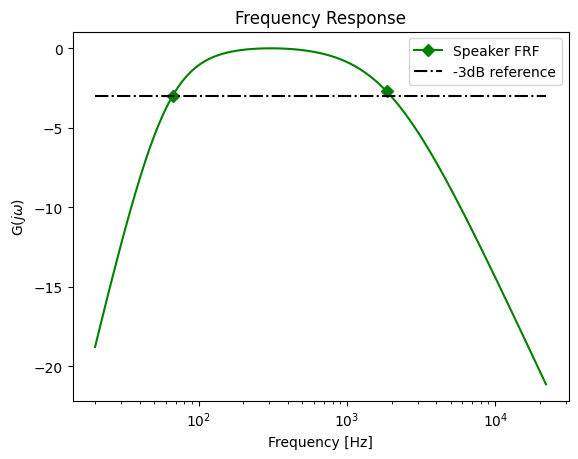

In [4]:
# finding the Bandwidth
Band_indexs = np.flatnonzero(np.where(FRF > -3, 1, 0)) # all the indices where FRF > -3dB
fc_min = f[Band_indexs[0]]
fc_max = f[Band_indexs[-1]]
BW = fc_max-fc_min 

# plot result
markers_on = [Band_indexs[0], Band_indexs[-1]]
plt.semilogx(f, FRF ,'-gD',markevery=markers_on,label="Speaker FRF")
plt.plot([fmin,fmax],[-3, -3],'-.k',label="-3dB reference")

# Add labels and a title
plt.xlabel('Frequency [Hz]')
plt.ylabel('G($j\omega$)')
plt.title('Frequency Response');
plt.legend(loc="best");
clear_output(wait=True)

print('f_min (Hz) =',fc_min)
print('f_max (Hz) =',fc_max)
print('Bandwidth (Hz) =',BW)

## 5 - Resposta a um sinal sonoro

### 5.1 - Importando um sinal de áudio

Primeiramente, vamos importar um sinal de áudio do tipo .wav. Esse tipo de arquivo pode ser facilmente lido com o auxílio da da função <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html"> *read* </a> da biblioteca *Scipy*.
O exemplo apresentado a seguir foi obitdo do sítio <a href="https://freesound.org/people/DaveJf/sounds/752447"> freesound.org </a>. O arquivo é um sinal de áudio estéreo (2 canais), como mostrado na figura a seguir.  

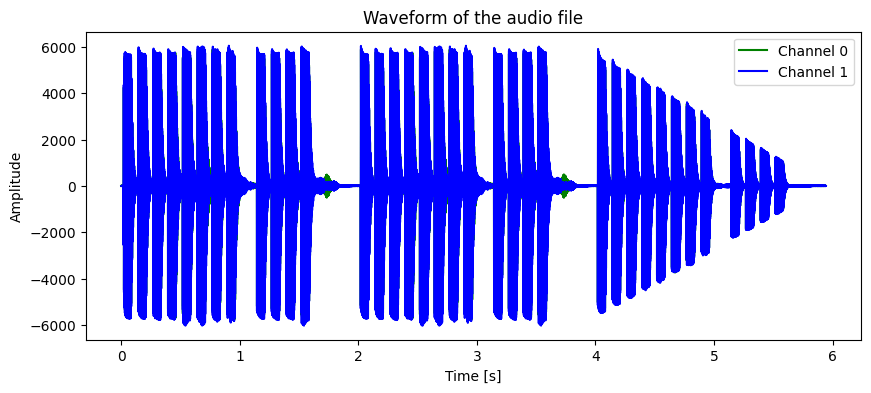

In [5]:
from scipy.io import wavfile

# Load the wave file
sample_rate, data = wavfile.read('audio_auto_falante.wav')
clear_output(wait=True)

# Generate time vector
num_samples = len(data)
duration = num_samples / sample_rate
time = np.linspace(0, duration, num_samples)

# The 'data' array contains amplitude values
CH0 = data[:,0] # channel 0 amplitude
CH1 = data[:,1] # channel 1 amplitude

print(f"Number of samples: {num_samples}")
print(f"Signal duration: {duration}s " )

# Optional: plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(time, CH0, 'g')
plt.plot(time, CH1, 'b')
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Waveform of the audio file")
plt.legend(['Channel 0', 'Channel 1'])
plt.show()

É importante destacar que a amplitude do arquivo de áudio não possui um significado físico direto. O que realmente importa para o alto-falante é o nível de tensão gerado na saída do sistema de áudio, e esse valor varia conforme a aplicação. Abaixo estão alguns exemplos típicos:

* Saída de áudio de um PC: de $2,0$ a $2,5$ V
* Sistema de som automotivo: de $4,0$ a $13,8$ V
* Aparelhos residenciais: de $4,0$ a $8,0$ V
* O bar da esquina tocando sertanejo: de $20$ a $70$ V

Desta forma, um alto-falante deve ser projetado levando-se em conta não apenas a faixa de frequência audível, mas também a potência de entrada do sistema ao qual ele será conectado. 

Para as simulações abaixo iremos considerar uma saída de áudio com valor de pico limitado a $2.0$ V. Para isso, precisamos normalizar o sinal de saída do arquivo de áudio.   

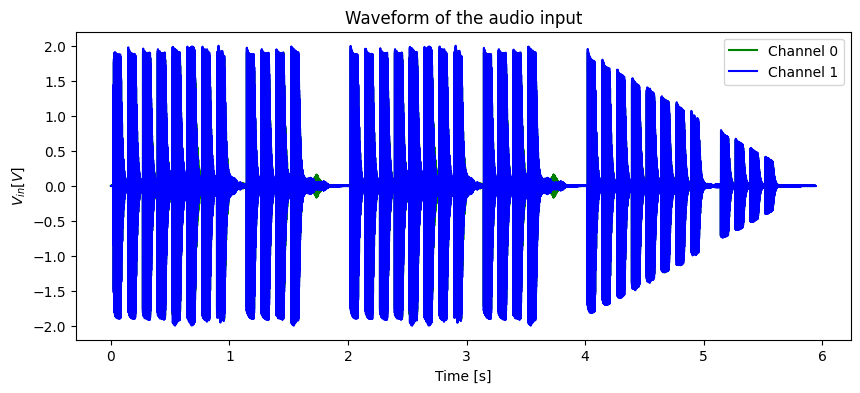

In [6]:
CH_max = np.max([np.max(np.abs(CH0)),np.max(np.abs(CH1))])

Amplitude = 2.0
CH0 = Amplitude*CH0/CH_max # channel 0 PC amplitude
CH1 = Amplitude*CH1/CH_max # channel 1 PC amplitude

# Optional: plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(time, CH0, 'g')
plt.plot(time, CH1, 'b')
plt.xlabel("Time [s]")
plt.ylabel("$V_{in} [V]$")
plt.title("Waveform of the audio input")
plt.legend(['Channel 0', 'Channel 1'])
plt.show()

### 5.2 - Resposta em frequência do sinal de áudio

Por meio da transformada rápida de Fourier (FFT), podemos ter uma estimativa do espectro de frequência do sinal de áudio. 
Para facilitar a visualização, as componentes espectrais foram normalizadas em função da maior componente encontrada.

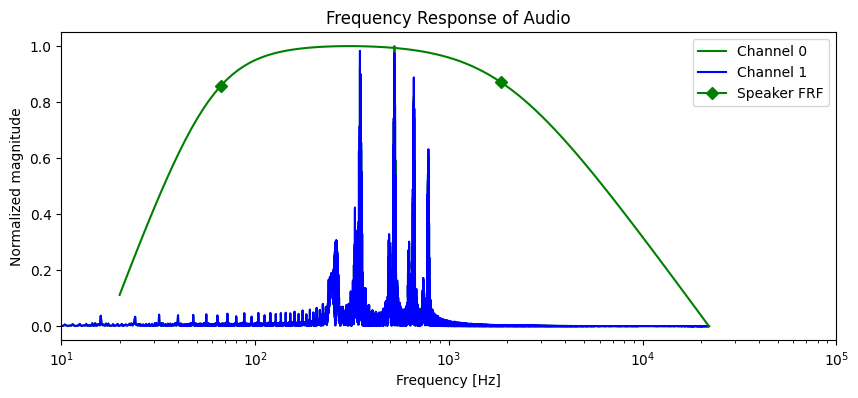

In [8]:
# Compute the FFT
N = len(CH0)
frequencies = np.fft.fftfreq(N, d=1/sample_rate)
fft_CH0 = np.fft.fft(CH0)
fft_CH1 = np.fft.fft(CH1)

# Get the magnitude of the frequency response
magnitude_CH0 = np.abs(fft_CH0)
magnitude_CH1 = np.abs(fft_CH1)

CH_max = np.max([np.max(magnitude_CH0),np.max(magnitude_CH1)])

# Plot the frequency response (magnitude vs frequency)
plt.figure(figsize=(10, 4))
plt.semilogx(frequencies[:N // 2], magnitude_CH0[0:N // 2]/CH_max ,'g')
plt.semilogx(frequencies[:N // 2], magnitude_CH1[0:N // 2]/CH_max ,'b')
plt.semilogx(f, (FRF-np.min(FRF))/np.max(FRF-np.min(FRF)) ,'-gD',markevery=markers_on,label="FRF")
plt.title('Frequency Response of Audio')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Normalized magnitude')
plt.legend(['Channel 0', 'Channel 1', 'Speaker FRF'])
plt.xlim(10,1e5)
plt.show()

A partir do resultado obtido, é possível ver que os sons mais graves estão fora da banda passante do alto-falante de Pedersen, resultando em perda de qualidade. 

### 5.3 - Calculando a resposta do alto-falante ao sinal de áudio

Esse efeito pode ser visualmente observado aplicando a função de transferência $G(j\omega)$ à FFT de cada canal ou, aternativamente, simulando o sistema no domínio do tempo. Como estamos aproximando o alto-falante por um modelo linear e já calculamos as componetes espectrais dos dois canais, encontrar a resposta do alto-falante para cada canal de áudio no domínio da frequência parece uma opçâo natural. Entretanto, calcular a resposta do sistema para cada componente espectral do sinal sonoro pode se tornar uma tarefa computacionalmente custosa, uma vez que para cada componente precisamos encontrar a solução para o sistema $Z = (j\omega I-A)^{-1}BU$.

A seguir iremos simular a resposta do alto-falante para o sinal de áudio no domínio do tempo usando a função *solve_ivp*. Para isso, primeiramente precisamos rescrever a representação em espaço de estados da forma $y = f(t,x)$

In [11]:
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d, splrep, splev 

# interpolate the channels 
ch0 = interp1d(time, CH0) #, kind='quadratic')
ch1 = interp1d(time, CH1) #, kind='quadratic')

# Creating the function f(t,x) for solving with the solve_IVP function
def fch0(t,x): # function f(x(t),t) 
    return A.dot(x)+B*(ch0(t))

def fch1(t,x): # function f(x(t),t) 
    return A.dot(x)+B*(ch1(t))

Resolvendo o sistema para cada canal:

In [12]:
# Response to channel 0
sol_CH0 = solve_ivp(fch0, [0, duration],[0,0,0])#, t_eval=time)

In [13]:
# Response to channel 1
#sol_CH1 = solve_ivp(fch1, [0, duration],[0,0,0])#, t_eval=time)
sol_CH1 = sol_CH0 # fast test

Calculando a aceleração:

In [14]:
from scipy.interpolate import interp1d, splrep, splev 

# find the acceleration from the state variables
acceleration_0 = Bl/m*sol_CH0.y[0,:] -k/m*sol_CH0.y[1,:] -b/m*sol_CH0.y[2,:]
acceleration_1 = Bl/m*sol_CH1.y[0,:] -k/m*sol_CH1.y[1,:] -b/m*sol_CH1.y[2,:]

#spline interpolation to fit the wav format
acc_0 = splev(time,splrep(sol_CH0.t, acceleration_0))
acc_1 = splev(time,splrep(sol_CH1.t, acceleration_1))

Salvando o resultado em um arquivo .wav

In [22]:
# Saiving the output file
stereo_signal = np.column_stack((acc_0, acc_1))
stereo_signal = stereo_signal/np.max(stereo_signal)

# write the output file
wavfile.write('saida_auto_falante_.wav', sample_rate, stereo_signal.astype(np.float32))

### 5.4 - Resultados

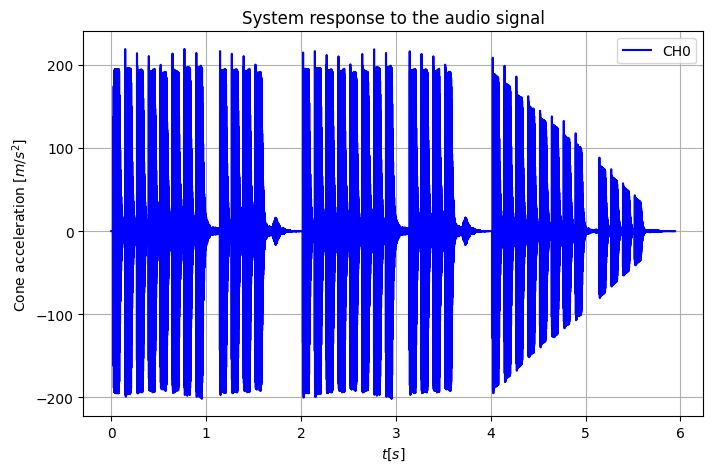

In [29]:
fig = plt.figure(figsize=(8,5))
#plt.subplot(1, 2, 1)
# plt.plot(time, acc_0, 'g', linewidth=1.5);
plt.plot(time, acc_1, 'b', linewidth=1.5);
plt.grid(True);
plt.xlabel('$t [s]$');
plt.ylabel('Cone acceleration $[m/s^2]$');
plt.legend(['CH0','CH1']);
plt.title('System response to the audio signal');

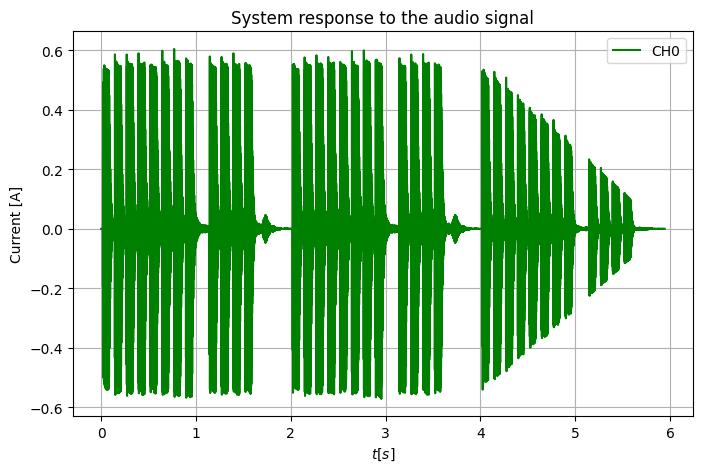

In [24]:
fig = plt.figure(figsize=(8,5))
#plt.subplot(1, 2, 1)
plt.plot(sol_CH0.t, sol_CH0.y[0,:], 'g', linewidth=1.5);
#plt.plot(sol_CH1.t, sol_CH1.y[0,:], 'b', linewidth=1.5);
plt.grid(True);
plt.xlabel('$t [s]$');
plt.ylabel('Current [A]');
plt.legend(['CH0','CH1']);
plt.title('System response to the audio signal');

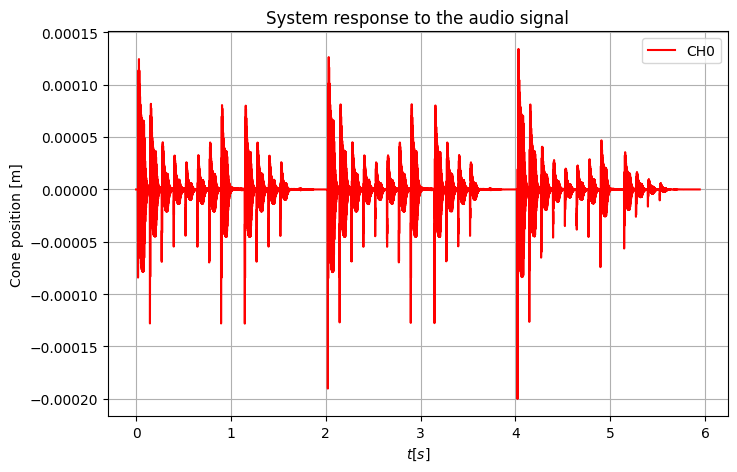

In [27]:
fig = plt.figure(figsize=(8,5))
#plt.subplot(1, 2, 1)
#plt.plot(sol_CH0.t, sol_CH0.y[1,:], 'g', linewidth=1.5);
plt.plot(sol_CH1.t, sol_CH1.y[1,:], 'r', linewidth=1.5);
plt.grid(True);
plt.xlabel('$t [s]$');
plt.ylabel('Cone position [m]');
plt.legend(['CH0','CH1']);
plt.title('System response to the audio signal');

#### Resultado no domínio da frequência

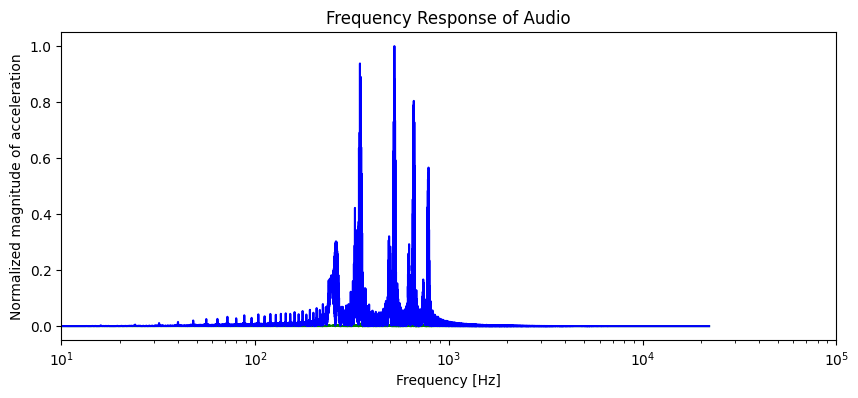

In [26]:
# Compute the FFT
N = len(acc_0)
frequencies = np.fft.fftfreq(N, d=1/sample_rate)
fft_acc = np.fft.fft(acc_0)

# Get the magnitude of the frequency response
magnitude_acc = np.abs(fft_acc)
magnitude_acc[0] = 0 # remove DC component

CH_max = np.max(magnitude_acc)

# Plot the frequency response (magnitude vs frequency)
plt.figure(figsize=(10, 4))
plt.semilogx(frequencies[:N // 2], magnitude_CH0[0:N // 2]/CH_max ,'g')
plt.semilogx(frequencies[:N // 2], magnitude_acc[:N // 2]/CH_max ,'b')
plt.title('Frequency Response of Audio')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Normalized magnitude of acceleration')
plt.xlim(10,1e5)
plt.show()